#Лабораторная работа №2

#Введение

В данной лабораторной работе нужно реализовать обучение однослойного перцептрона на задачах OR и AND
классическим методом и по правилу Хебба.

Импортируем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Реализация

Реализуем класс перцептрона

КЛАССИЧЕСКИЙ МЕТОД

Алгоритм:
Для каждой эпохи:
Для каждого примера (x, y_target):

1. $ \hat{y} = f(w \cdot x + b) $  

2. $\varepsilon = y_{target} - \hat{y}$    

3. $w = w + \eta \cdot \varepsilon \cdot x$

4. $b = b + \eta \cdot \varepsilon$
  
Критерии остановки:
- Фиксированное число эпох
- MAE (средняя абсолютная ошибка) < порога

ПРАВИЛО ХЕББА

Алгоритм:

Для каждого примера (x, y_target):
1. $w = w + \eta \cdot x \cdot y_{target}$
2. $b = b + \eta \cdot y_{target}$

In [2]:
class Perceptron:
    def __init__(self, num_inputs=2, learning_rate=0.1):
        self.weights = np.zeros(num_inputs)
        self.bias = 0
        self.lr = learning_rate

    def predict(self, inputs):
        z = np.dot(self.weights, inputs) + self.bias
        return 1 if z >= 0 else 0

    def train_classic(self, X, y, epochs=10, verbose=True):
        errors_history = []

        for epoch in range(epochs):
            total_error = 0

            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                total_error += abs(error)

                self.weights += self.lr * error * inputs
                self.bias += self.lr * error

            mae = total_error / len(X)
            errors_history.append(mae)

            if verbose:
                print(f"  Эпоха {epoch:2d}: MAE = {mae:.4f}")

            if mae == 0:
                break

        return errors_history

    def train_to_mae(self, X, y, mae_threshold=0.01, max_epochs=1000):
        epoch = 0
        errors_history = []

        while epoch < max_epochs:
            total_error = 0

            for inputs, target in zip(X, y):
                prediction = self.predict(inputs)
                error = target - prediction
                total_error += abs(error)

                self.weights += self.lr * error * inputs
                self.bias += self.lr * error

            mae = total_error / len(X)
            errors_history.append(mae)
            epoch += 1

            if mae <= mae_threshold:
                break

        return errors_history, epoch

    def train_hebb(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for inputs, target in zip(X, y):
            self.weights += self.lr * inputs * target
            self.bias += self.lr * target

        return self.weights, self.bias


Данные для задачи

In [3]:
# Данные для OR
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Данные для AND
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

print(f"Данные OR:")
for inputs, target in zip(X_or, y_or):
    print(f"  {inputs} -> {target}")

print(f"\nДанные AND:")
for inputs, target in zip(X_and, y_and):
    print(f"  {inputs} -> {target}")

Данные OR:
  [0 0] -> 0
  [0 1] -> 1
  [1 0] -> 1
  [1 1] -> 1

Данные AND:
  [0 0] -> 0
  [0 1] -> 0
  [1 0] -> 0
  [1 1] -> 1


Проведем эксперименты с разным количеством эпох

In [6]:
print("\nЗадача OR")
epochs_list = [1, 2, 3, 5, 10]

for epochs in epochs_list:
    print(f"\nОбучаем {epochs} эпох:")
    perceptron = Perceptron(learning_rate=0.1)
    mae_history = perceptron.train_classic(X_or, y_or, epochs=epochs, verbose=False)

    correct = 0
    for inputs, target in zip(X_or, y_or):
        if perceptron.predict(inputs) == target:
            correct += 1

    accuracy = (correct / 4) * 100
    mae_final = mae_history[-1] if mae_history else 0
    print(f"  Точность: {correct}/4 ({accuracy:.0f}%)")
    print(f"  MAE (последняя эпоха): {mae_final:.4f}")

print("\nЗадача AND")

for epochs in epochs_list:
    print(f"\nОбучаем {epochs} эпох:")
    perceptron = Perceptron(learning_rate=0.1)
    mae_history = perceptron.train_classic(X_and, y_and, epochs=epochs, verbose=False)

    correct = 0
    for inputs, target in zip(X_and, y_and):
        if perceptron.predict(inputs) == target:
            correct += 1

    accuracy = (correct / 4) * 100
    mae_final = mae_history[-1] if mae_history else 0
    print(f"  Точность: {correct}/4 ({accuracy:.0f}%)")
    print(f"  MAE (последняя эпоха): {mae_final:.4f}")


Задача OR

Обучаем 1 эпох:
  Точность: 3/4 (75%)
  MAE (последняя эпоха): 0.5000

Обучаем 2 эпох:
  Точность: 3/4 (75%)
  MAE (последняя эпоха): 0.5000

Обучаем 3 эпох:
  Точность: 4/4 (100%)
  MAE (последняя эпоха): 0.2500

Обучаем 5 эпох:
  Точность: 4/4 (100%)
  MAE (последняя эпоха): 0.0000

Обучаем 10 эпох:
  Точность: 4/4 (100%)
  MAE (последняя эпоха): 0.0000

Задача AND

Обучаем 1 эпох:
  Точность: 1/4 (25%)
  MAE (последняя эпоха): 0.5000

Обучаем 2 эпох:
  Точность: 2/4 (50%)
  MAE (последняя эпоха): 0.7500

Обучаем 3 эпох:
  Точность: 4/4 (100%)
  MAE (последняя эпоха): 0.7500

Обучаем 5 эпох:
  Точность: 4/4 (100%)
  MAE (последняя эпоха): 0.0000

Обучаем 10 эпох:
  Точность: 4/4 (100%)
  MAE (последняя эпоха): 0.0000


Обучение до порогового MAE

In [8]:
print("\nЗадача OR (порог MAE = 0.01):")
perceptron_or_mae = Perceptron(learning_rate=0.1)
mae_history_or, epochs_needed_or = perceptron_or_mae.train_to_mae(X_or, y_or, mae_threshold=0.01)
print(f"  Потребовалось эпох: {epochs_needed_or}")
print(f"  MAE (последняя эпоха): {mae_history_or[-1]:.4f}")

print("\nЗадача AND (порог MAE = 0.01):")
perceptron_and_mae = Perceptron(learning_rate=0.1)
mae_history_and, epochs_needed_and = perceptron_and_mae.train_to_mae(X_and, y_and, mae_threshold=0.01)
print(f"  Потребовалось эпох: {epochs_needed_and}")
print(f"  MAE (последняя эпоха): {mae_history_and[-1]:.4f}")


Задача OR (порог MAE = 0.01):
  Потребовалось эпох: 4
  MAE (последняя эпоха): 0.0000

Задача AND (порог MAE = 0.01):
  Потребовалось эпох: 4
  MAE (последняя эпоха): 0.0000


Обучим по правилу Хебба

In [10]:
print("\nЗадача OR:")
perceptron_or_hebb = Perceptron(learning_rate=0.1)
weights_hebb_or, bias_hebb_or = perceptron_or_hebb.train_hebb(X_or, y_or)
print(f"  Веса: {weights_hebb_or}, смещение: {bias_hebb_or:.4f}")

print("\nЗадача AND:")
perceptron_and_hebb = Perceptron(learning_rate=0.1)
weights_hebb_and, bias_hebb_and = perceptron_and_hebb.train_hebb(X_and, y_and)
print(f"  Веса: {weights_hebb_and}, смещение: {bias_hebb_and:.4f}")


Задача OR:
  Веса: [0.2 0.2], смещение: 0.3000

Задача AND:
  Веса: [0.1 0.1], смещение: 0.1000


Выведем результаты в DataFrame

In [11]:
from IPython.display import display

perceptron_or_classic = Perceptron(learning_rate=0.1)
perceptron_or_classic.train_classic(X_or, y_or, epochs=10, verbose=False)

perceptron_and_classic = Perceptron(learning_rate=0.1)
perceptron_and_classic.train_classic(X_and, y_and, epochs=10, verbose=False)

print("\nРезультаты для OR:")
results_or = []
for inputs, target in zip(X_or, y_or):
    pred_classic = perceptron_or_classic.predict(inputs)
    pred_mae = perceptron_or_mae.predict(inputs)
    pred_hebb = perceptron_or_hebb.predict(inputs)

    results_or.append({
        'x1': inputs[0],
        'x2': inputs[1],
        'target': target,
        'classic': pred_classic,
        'mae': pred_mae,
        'hebb': pred_hebb,
        'correct_classic': target == pred_classic,
        'correct_mae': target == pred_mae,
        'correct_hebb': target == pred_hebb
    })

df_or = pd.DataFrame(results_or)
display(df_or)

print("\nРезультаты для AND:")
results_and = []
for inputs, target in zip(X_and, y_and):
    pred_classic = perceptron_and_classic.predict(inputs)
    pred_mae = perceptron_and_mae.predict(inputs)
    pred_hebb = perceptron_and_hebb.predict(inputs)

    results_and.append({
        'x1': inputs[0],
        'x2': inputs[1],
        'target': target,
        'classic': pred_classic,
        'mae': pred_mae,
        'hebb': pred_hebb,
        'correct_classic': target == pred_classic,
        'correct_mae': target == pred_mae,
        'correct_hebb': target == pred_hebb
    })

df_and = pd.DataFrame(results_and)
display(df_and)


Результаты для OR:


,x1,x2,target,classic,mae,hebb,correct_classic,correct_mae,correct_hebb
0,0,0,0,0,0,1,True,True,False
1,0,1,1,1,1,1,True,True,True
2,1,0,1,1,1,1,True,True,True
3,1,1,1,1,1,1,True,True,True



Результаты для AND:


,x1,x2,target,classic,mae,hebb,correct_classic,correct_mae,correct_hebb
0,0,0,0,0,0,1,True,True,False
1,0,1,0,0,0,1,True,True,False
2,1,0,0,0,0,1,True,True,False
3,1,1,1,1,1,1,True,True,True


Из таблиц видно, что предсказание по правилу Хебба не всегда верно, это происходит потому что правило Хебба $\Delta w = \eta \cdot x\cdot y_{target}$ не обновляет веса для примеров с $y_{target}=0$. В результате перцептрон не учится распознавать отрицательные примеры, такие как (0,0) для OR и (0,0), (0,1), (1,0) для AND. Поэтому на этих примерах перцептрон ошибается, предсказывая 1 вместо 0. Классический метод обучения перцептрона лишен этого недостатка, так как обновляет веса на основе ошибки $ \varepsilon = y_{target} - \hat{y}$ для всех примеров.

Визуализируем данные

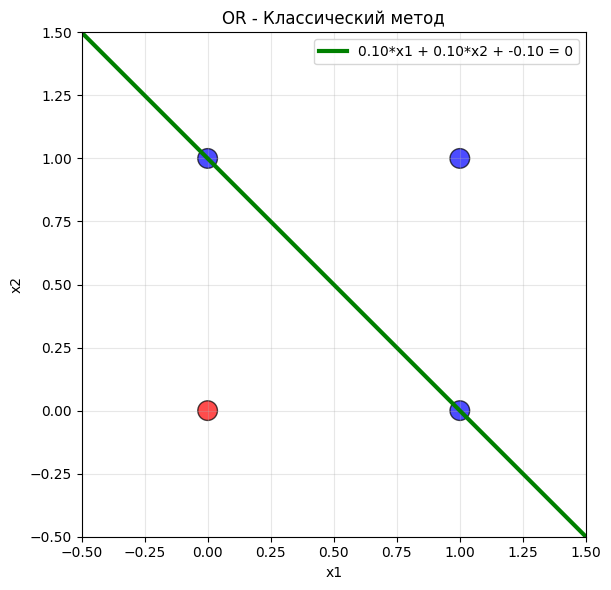

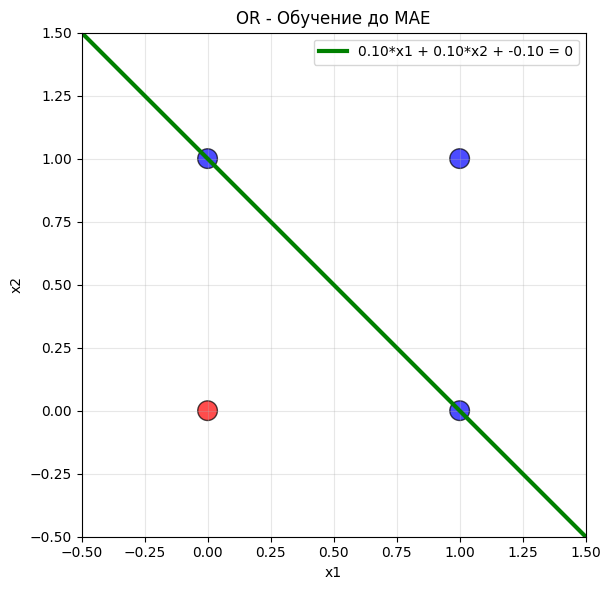

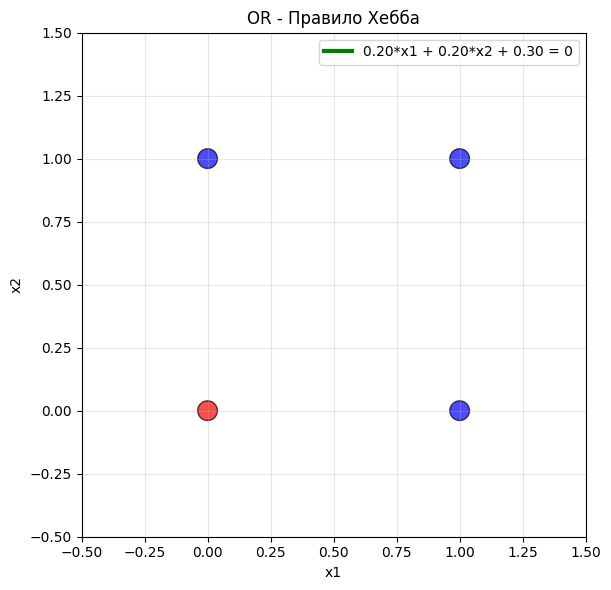

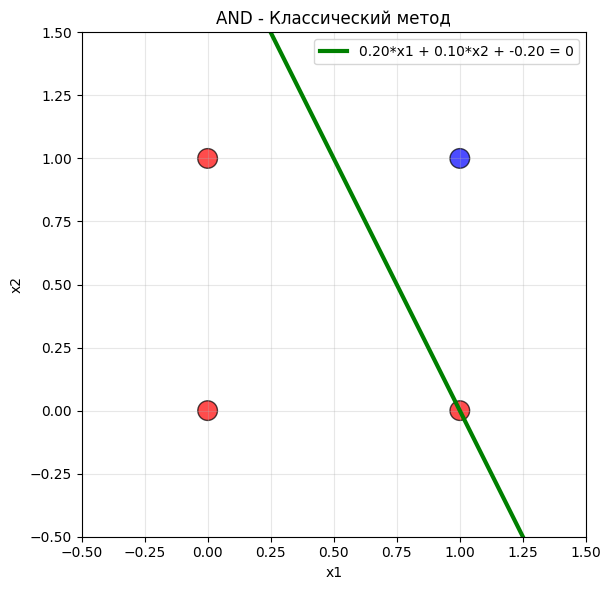

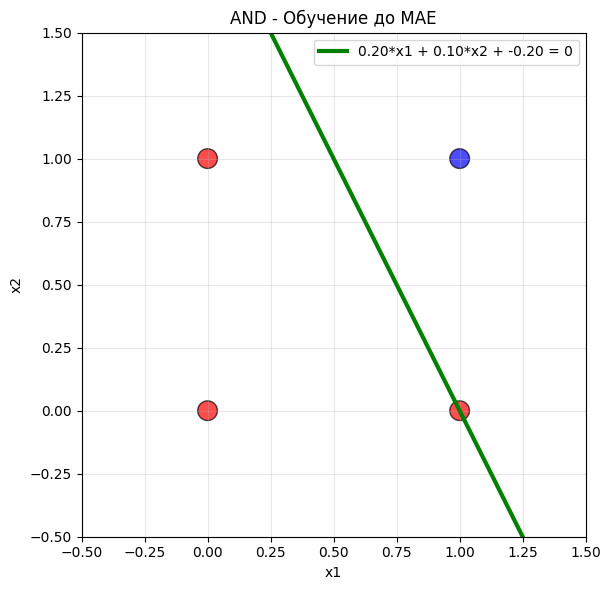

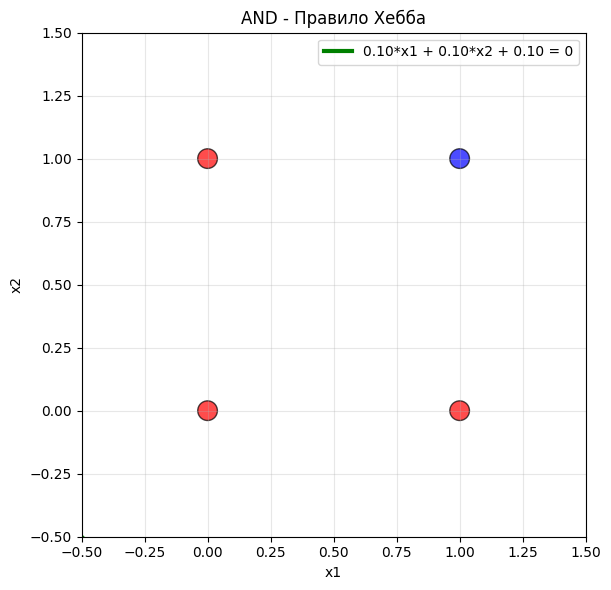

In [ ]:
def plot_decision_boundary(perceptron, X, y, title):
    fig, ax = plt.subplots(figsize=(8, 6))

    colors = ['red' if val == 0 else 'blue' for val in y]
    ax.scatter(X[:, 0], X[:, 1], c=colors, s=200, alpha=0.7, edgecolors='k')

    w1, w2 = perceptron.weights
    b = perceptron.bias

    if abs(w2) > 1e-10:
        x1_vals = np.array([-0.5, 1.5])
        x2_vals = -(w1 * x1_vals + b) / w2
        ax.plot(x1_vals, x2_vals, 'g-', linewidth=3, label=f'{w1:.2f}*x1 + {w2:.2f}*x2 + {b:.2f} = 0')

    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title(title)
    ax.grid(True, alpha=0.3)
    if abs(w2) > 1e-10:
        ax.legend()
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

plot_decision_boundary(perceptron_or_classic, X_or, y_or, 'OR - Классический метод')
plot_decision_boundary(perceptron_or_mae, X_or, y_or, 'OR - Обучение до MAE')
plot_decision_boundary(perceptron_or_hebb, X_or, y_or, 'OR - Правило Хебба')

plot_decision_boundary(perceptron_and_classic, X_and, y_and, 'AND - Классический метод')
plot_decision_boundary(perceptron_and_mae, X_and, y_and, 'AND - Обучение до MAE')
plot_decision_boundary(perceptron_and_hebb, X_and, y_and, 'AND - Правило Хебба')

На графиках для правила Хебба отсутствуют разделяющие прямые, потому что обученный перцептрон всегда предсказывает 1 для любых входных данных. Это происходит из-за положительного смещения, которое накапливается в процессе обучения. Визуально это означает, что разделяющая линия ушла за пределы графика, оставив все точки по одну сторону.

В то же время, классический метод обучения правильно находит разделяющие прямые для обеих задач: для OR линия отделяет точку (0,0) от остальных, а для AND — отделяет точку (1,1) от остальных. Это подтверждает, что классический метод работает корректно.

#Заключение

Проделав данную лабораторную работу, можно сделать следующий вывод.
Был реализован однослойный перцептрон и проведено его обучение на задачах
OR и AND классическим методом и по правилу Хебба.

Классический метод обучения показал отличные результаты, достигая
100% точности на обеих задачах. Метод обучения до достижения порогового MAE также
демонстрирует высокую эффективность. Разделяющие прямые, построенные на графиках, наглядно
подтверждают корректность обучения.

Правило Хебба, в свою очередь, показало ограниченную применимость
для задач бинарной классификации с метками {0, 1}. Из-за того, что
правило $\Delta w = \eta \cdot x \cdot y$ не обновляет веса для примеров с y=0, нейрон не
учится распознавать отрицательные примеры. Это приводит к ошибкам на
точках (0,0) для OR и (0,0), (0,1), (1,0) для AND, а также к отсутствию
видимых разделяющих прямых на графиках.
